# Relaciones entre fricción , velocidad, diametro y Caudal

Caudal = velocidad · area

Para una cañería

$F = v · \frac{\pi·d^2}{4}$

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [1]:
v1 = 1 #m/s
d_in = 1 #inch2  Cañería 1 pulgada
d_m = d_in * 0.0254

In [2]:
d_m

0.0254

Área

In [5]:
np.pi

3.141592653589793

In [8]:
area1 = np.pi * d_m**2 /4    #m2

Caudal

In [10]:
F1_m3s = v1 * area1
F1_m3s

0.0005067074790974977

In [11]:
F1_m3h = F1_m3s * 3600
F1_m3h

1.8241469247509916

## Ahora para cualquier velocidad y diámetro

In [26]:
def caudalm3h(vel, diam):
    """velocidad en m/s y diametro en plg"""
    d_m = diam * 0.0254
    area = np.pi * d_m**2 /4
    F_m3s = vel * area
    F_m3h = F_m3s * 3600
    return F_m3h

In [27]:
F1prueba = caudalm3h(1,1)
F1prueba

1.8241469247509916

In [28]:
F1_m3h - F1prueba

0.0

## Cambio del caudal con la velocidad

In [120]:
velocidades1 = np.arange(0,7,1)
velocidades1

array([0, 1, 2, 3, 4, 5, 6])

In [121]:
diametrocte = np.ones_like(velocidades1)
diametrocte

array([1, 1, 1, 1, 1, 1, 1])

In [122]:
Alturavelvar = caudalm3h(velocidades1,diametrocte)
Alturavelvar

array([  0.        ,   1.82414692,   3.64829385,   5.47244077,
         7.2965877 ,   9.12073462,  10.94488155])

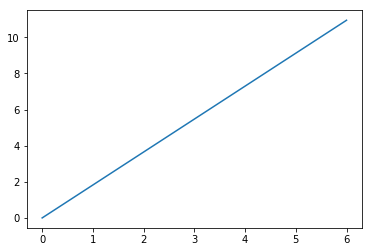

In [123]:
plt.plot(velocidades1, Alturavelvar)

In [124]:
for v in velocidades1:
    f = caudalm3h(v, 1)
    print ('velocidad',v,'caudal', f)


velocidad 0 caudal 0.0
velocidad 1 caudal 1.82414692475
velocidad 2 caudal 3.6482938495
velocidad 3 caudal 5.47244077425
velocidad 4 caudal 7.296587699
velocidad 5 caudal 9.12073462375
velocidad 6 caudal 10.9448815485


## Cambio del caudal con el Diámetro

In [90]:
diametros1 = np.arange(1,8,1)
diametros1

array([1, 2, 3, 4, 5, 6, 7])

In [91]:
velocidadcte = np.ones_like(diametros1)
velocidadcte

array([1, 1, 1, 1, 1, 1, 1])

In [92]:
AlturaDiamVar = caudalm3h(velocidadcte,diametros1)
AlturaDiamVar

array([  1.82414692,   7.2965877 ,  16.41732232,  29.1863508 ,
        45.60367312,  65.66928929,  89.38319931])

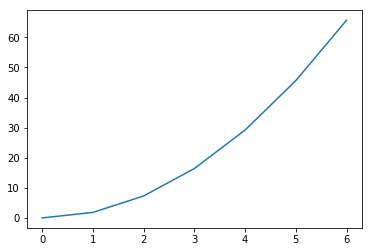

In [48]:
plt.plot(diametros1, AlturaDiamVar)

In [93]:
for d in diametros1:
    f = caudalm3h(1, d)
    print ('diámetro',d,'caudal', f)

diámetro 1 caudal 1.82414692475
diámetro 2 caudal 7.296587699
diámetro 3 caudal 16.4173223228
diámetro 4 caudal 29.186350796
diámetro 5 caudal 45.6036731188
diámetro 6 caudal 65.669289291
diámetro 7 caudal 89.3831993128


## Caida de presión expresada en m/m

### 1 m/s

$$ \frac{hf}{L} = f_D · \frac{1}{d} · \frac{v^2}{2·g}$$

para $fd = 0.03$

In [94]:
d_m

0.0254

In [55]:
from scipy.constants import g
g

9.80665

In [56]:
fd = 0.03
v = 1    #m/s

In [95]:
hfL = fd / d_m * v**2 / (2 * g)
hfL

0.06021946139633434

Función

In [108]:
def CaidaxMetroCañeria(vel, diam, fd):
    """velocidad en m/s y diametro en plg"""
    d_m = diam * 0.0254
    g = 9.80665
    return fd * 1 / d_m * vel**2 / (2 * g)

In [109]:
prueba1 = CaidaxMetroCañeria(1,1,0.03)
prueba1

0.06021946139633434

In [65]:
len(diametros1)

7

In [98]:
fdvariables = np.linspace(0.0,0.9,7)
fdvariables

array([ 0.  ,  0.15,  0.3 ,  0.45,  0.6 ,  0.75,  0.9 ])

In [115]:
fdconstantes = np.ones_like(fdvariables)*0.03
fdconstantes

array([ 0.03,  0.03,  0.03,  0.03,  0.03,  0.03,  0.03])

## Cambio Caida con el Diámetro

In [125]:
hf_diam = CaidaxMetroCañeria(velocidadcte,diametros1,fdconstantes)
hf_diam

array([ 0.06021946,  0.03010973,  0.02007315,  0.01505487,  0.01204389,
        0.01003658,  0.00860278])

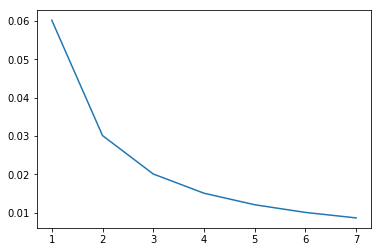

In [117]:
plt.plot(diametros1,hf_diam)

In [118]:
for d in diametros1:
    hf = CaidaxMetroCañeria(1, d, 0.03) 
    print ('diámetro',d,'caida', hf)

diámetro 1 caida 0.0602194613963
diámetro 2 caida 0.0301097306982
diámetro 3 caida 0.0200731537988
diámetro 4 caida 0.0150548653491
diámetro 5 caida 0.0120438922793
diámetro 6 caida 0.0100365768994
diámetro 7 caida 0.00860278019948


## Cambio Caida con la velocidad

In [126]:
hf_vel = CaidaxMetroCañeria(velocidades1,diametrocte,fdconstantes)
hf_vel

array([ 0.        ,  0.06021946,  0.24087785,  0.54197515,  0.96351138,
        1.50548653,  2.16790061])

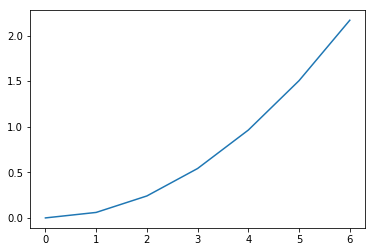

In [127]:
plt.plot(velocidades1,hf_vel)

In [128]:
for v in velocidades1:
    hf = CaidaxMetroCañeria(v, 1, 0.03) 
    print ('velocidad',v,'caida', hf)

velocidad 0 caida 0.0
velocidad 1 caida 0.0602194613963
velocidad 2 caida 0.240877845585
velocidad 3 caida 0.541975152567
velocidad 4 caida 0.963511382341
velocidad 5 caida 1.50548653491
velocidad 6 caida 2.16790061027


## Cambio Caida con fd

In [129]:
hf_fd = CaidaxMetroCañeria(velocidadcte,diametrocte,fdvariables)
hf_fd

array([ 0.        ,  0.30109731,  0.60219461,  0.90329192,  1.20438923,
        1.50548653,  1.80658384])

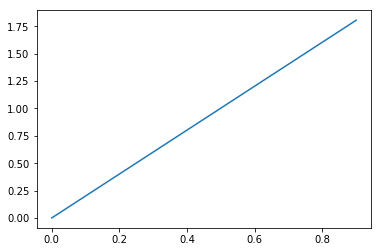

In [130]:
plt.plot(fdvariables,hf_fd)

In [132]:
for fd in fdvariables:
    hf = CaidaxMetroCañeria(1, 1, fd) 
    print ('fd %.2f caida %.2f' %(fd, hf))

fd 0.00 caida 0.00
fd 0.15 caida 0.30
fd 0.30 caida 0.60
fd 0.45 caida 0.90
fd 0.60 caida 1.20
fd 0.75 caida 1.51
fd 0.90 caida 1.81
